In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

mon_features = pd.read_csv('/content/drive/MyDrive/ML_Project/mon_features.csv')
mon_labels = pd.read_csv('/content/drive/MyDrive/ML_Project/mon_labels.csv')

unmon_features = pd.read_csv('/content/drive/MyDrive/ML_Project/unmon_features.csv')
unmon_labels = pd.read_csv('/content/drive/MyDrive/ML_Project/unmon_labels.csv')

In [6]:
features = pd.concat([mon_features, unmon_features], axis=0, ignore_index=True)
labels = pd.concat([mon_labels, unmon_labels], axis=0, ignore_index=True)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def scaler_samples(train_X,test_X):
  scaler = StandardScaler()
  train_X = scaler.fit_transform(train_X)
  test_X = scaler.transform(test_X)

X, y = features, labels

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

In [8]:
from sklearn.tree import DecisionTreeClassifier

dt_multi = DecisionTreeClassifier(random_state=1)
dt_multi.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = dt_multi.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix\n {conf_matrix}")

Accuracy: 0.5768965517241379
Confusion Matrix
 [[1286   15    6 ...   20    0    6]
 [  13   11    0 ...    0    0    1]
 [  10    0   15 ...    0    0    0]
 ...
 [   9    1    1 ...   12    0    1]
 [   1    0    0 ...    0   39    0]
 [   6    1    0 ...    0    0   17]]


### Evaluation Metrics

In [11]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

In [13]:
# Calculating Precision and Recall
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

In [14]:
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.582333559952812
Recall: 0.5768965517241379


In [15]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

          -1       0.68      0.67      0.67      1932
           0       0.26      0.25      0.25        44
           1       0.48      0.33      0.39        45
           2       0.47      0.37      0.42        43
           3       0.47      0.61      0.53        36
           4       0.64      0.54      0.59        50
           5       0.55      0.58      0.56        38
           6       0.79      0.71      0.75        52
           7       0.67      0.59      0.62        41
           8       0.55      0.56      0.55        41
           9       0.67      0.62      0.65        50
          10       0.44      0.46      0.45        41
          11       0.34      0.46      0.39        35
          12       0.76      0.74      0.75        47
          13       0.23      0.22      0.23        36
          14       0.32      0.38      0.35        47
          15       0.42      0.45      0.43        44
   

Text(0, 0.5, 'Precision')

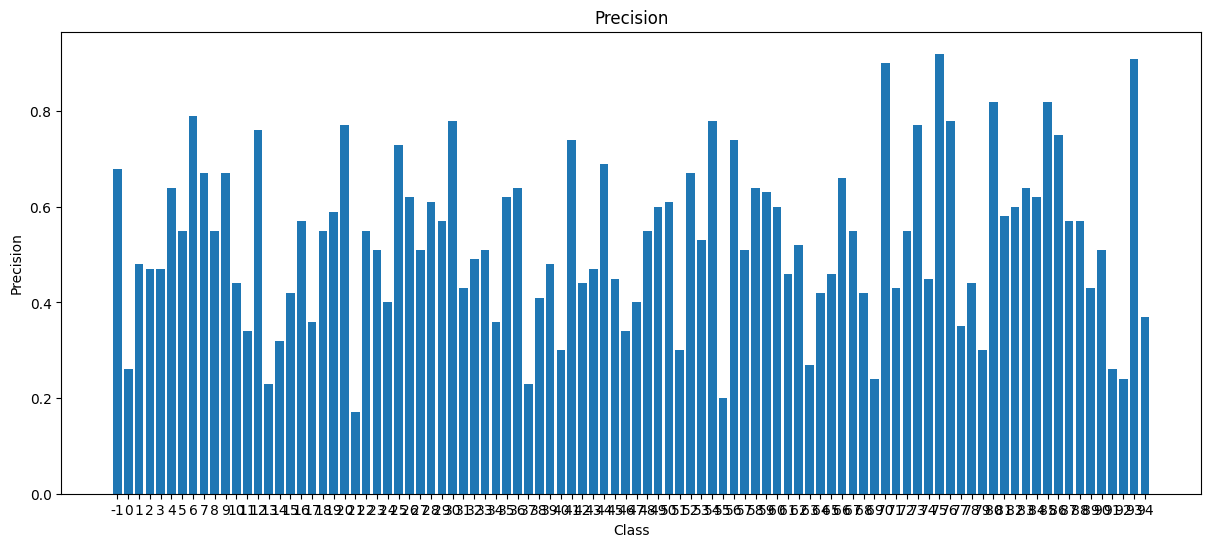

In [16]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd


data = []
lines = class_report.split('\n')
for line in lines[2:-5]:
    row = line.strip().split()
    class_name = row[0]
    precision = float(row[1])
    recall = float(row[2])
    f1_score = float(row[3])
    data.append([class_name, precision, recall, f1_score])


df = pd.DataFrame(data, columns=['Class', 'Precision', 'Recall', 'F1-score'])

plt.figure(figsize=(50, 6))

# Precision
plt.subplot(1, 3, 1)
plt.bar(df['Class'], df['Precision'])
plt.title('Precision')
plt.xlabel('Class')
plt.ylabel('Precision')

Text(0, 0.5, 'Recall')

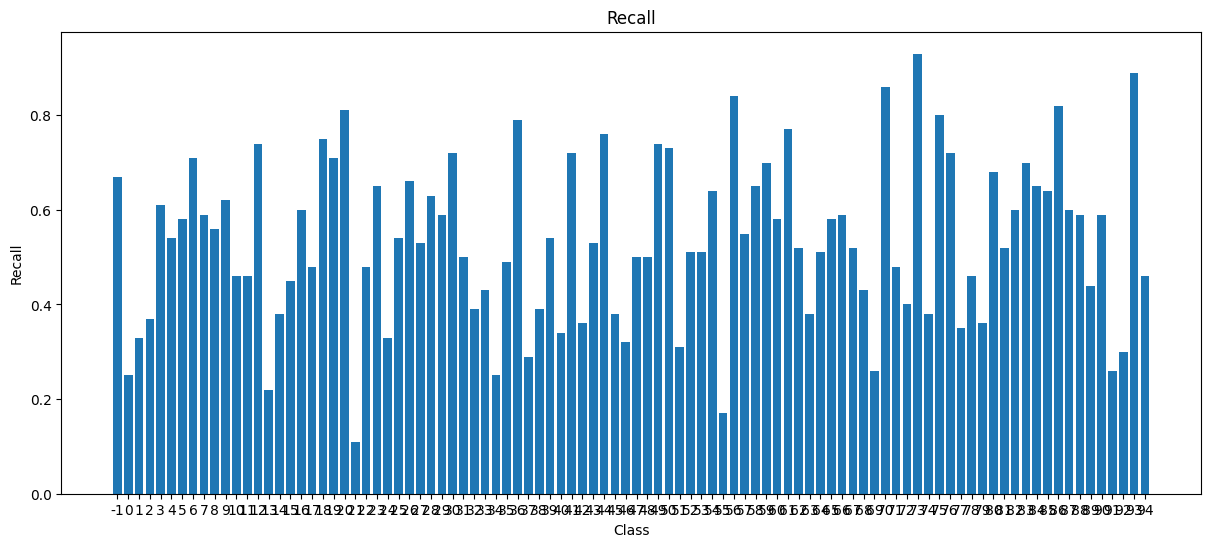

In [17]:
plt.figure(figsize=(50, 6))

# Recall
plt.subplot(1, 3, 2)
plt.bar(df['Class'], df['Recall'])
plt.title('Recall')
plt.xlabel('Class')
plt.ylabel('Recall')

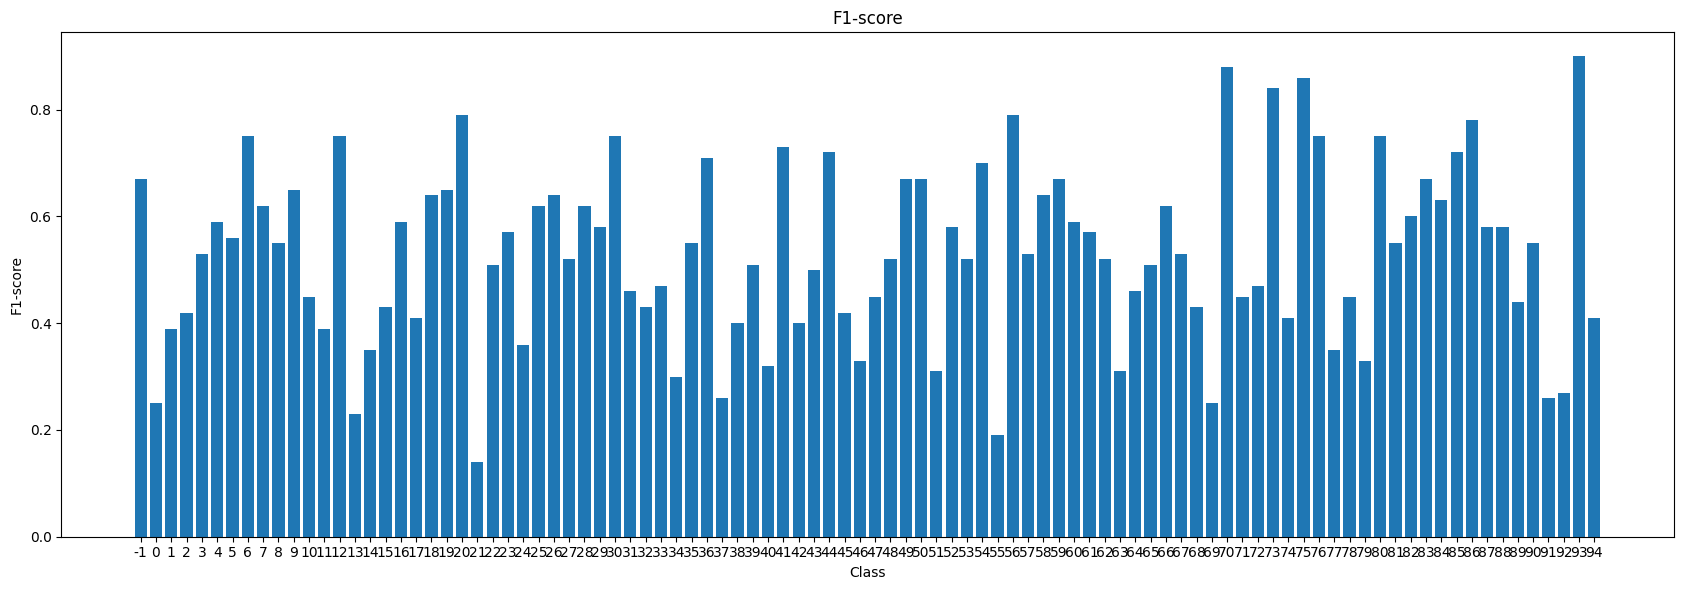

In [18]:
plt.figure(figsize=(50, 6))

# F1-score
plt.subplot(1, 3, 3)
plt.bar(df['Class'], df['F1-score'])
plt.title('F1-score')
plt.xlabel('Class')
plt.ylabel('F1-score')

plt.tight_layout()
plt.show()